In [1]:
# APPLY LEARNING MODEL ON PREVIOUSLY GENERATED FEATURES DATA

In [140]:
import pandas as pd
import sklearn as sk
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

from sklearn import feature_selection

In [202]:
tickers = [
    'JPM', 'GS', 'BAC', 'WFC', 'MS', 'C','BNY', 
    'AAPL', 'GOOGL', 'IBM', 'MSFT', 'ORCL', 'AMZN',
    'T', 'VZ', 'CAT', 'UAL', 'DAL', 'CSX',
    'XOM', 'CVX',
    'MCD', 'PEP', 'CLX', 'HD'
]
len(tickers)

25

In [142]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
data = pd.read_csv('ff_measures_2.csv', date_parser=dateparse,
                 index_col=0)

label = 'RP_LAG'
# data[label] = data[label] * 100 

In [143]:
data = data.sort_index()
# data = data.dropna()

In [144]:
train_set = data.tail(len(tickers) * 64).head(len(tickers) * 60)
test_set = data.tail(len(tickers) * 4)

In [145]:
print(train_set.shape)
print(test_set.shape)
list(train_set.columns)

(1500, 38)
(100, 38)


['Mkt-RF',
 'SMB',
 'HML',
 'RMW',
 'CMA',
 'RF',
 'RF_lag',
 'Close',
 'Adj Close',
 'return',
 'return_adj',
 'return_lag',
 'return_adj_lag',
 'ticker',
 'RP',
 'RP_ADJ',
 'RP_LAG',
 'RP_ADJ_LAG',
 'HML_3m',
 'Mkt-RF_3m',
 'RMW_3m',
 'CMA_3m',
 'SMB_3m',
 'HML_6m',
 'Mkt-RF_6m',
 'RMW_6m',
 'CMA_6m',
 'SMB_6m',
 'HML_9m',
 'Mkt-RF_9m',
 'RMW_9m',
 'CMA_9m',
 'SMB_9m',
 'HML_12m',
 'Mkt-RF_12m',
 'RMW_12m',
 'CMA_12m',
 'SMB_12m']

In [203]:
features_to_include = [
 'Mkt-RF',
 'SMB',
 'HML',
 'RMW',
 'CMA',
#  'HML_3m',
#  'Mkt-RF_3m',
#  'RMW_3m',
#  'CMA_3m',
#  'SMB_3m',
#  'HML_6m',
#  'Mkt-RF_6m',
#  'RMW_6m',
#  'CMA_6m',
#  'SMB_6m',
#  'HML_9m',
#  'Mkt-RF_9m',
#  'RMW_9m',
#  'CMA_9m',
#  'SMB_9m',
#  'HML_12m',
#  'Mkt-RF_12m',
#  'RMW_12m',
#  'CMA_12m',
#  'SMB_12m'
]
len(features_to_include)

5

In [204]:
# DATA EXPLORATION

In [205]:
data.tail(1000)

,Mkt-RF,SMB,HML,RMW,CMA,RF,RF_lag,Close,Adj Close,return,...,HML_9m,Mkt-RF_9m,RMW_9m,CMA_9m,SMB_9m,HML_12m,Mkt-RF_12m,RMW_12m,CMA_12m,SMB_12m
2015-11-01,0.56,3.34,-0.52,-2.57,-1.13,0.00,0.01,65.540001,59.556984,6.707918,...,-1.79,6.13,-1.07,-1.71,0.20,-2.99,2.55,1.40,0.20,-2.31
2015-11-01,0.56,3.34,-0.52,-2.57,-1.13,0.00,0.01,65.540001,59.556984,6.707918,...,-1.79,6.13,-1.07,-1.71,0.20,-2.99,2.55,1.40,0.20,-2.31
2015-11-01,0.56,3.34,-0.52,-2.57,-1.13,0.00,0.01,65.540001,59.556984,6.707918,...,-1.79,6.13,-1.07,-1.71,0.20,-2.99,2.55,1.40,0.20,-2.31
2015-11-01,0.56,3.34,-0.52,-2.57,-1.13,0.00,0.01,65.540001,59.556984,6.707918,...,-1.79,6.13,-1.07,-1.71,0.20,-2.99,2.55,1.40,0.20,-2.31
2015-11-01,0.56,3.34,-0.52,-2.57,-1.13,0.00,0.01,65.540001,59.556984,6.707918,...,-1.79,6.13,-1.07,-1.71,0.20,-2.99,2.55,1.40,0.20,-2.31
2015-11-01,0.56,3.34,-0.52,-2.57,-1.13,0.00,0.01,65.540001,59.556984,6.707918,...,-1.79,6.13,-1.07,-1.71,0.20,-2.99,2.55,1.40,0.20,-2.31
2015-11-01,0.56,3.34,-0.52,-2.57,-1.13,0.00,0.01,65.540001,59.556984,6.707918,...,-1.79,6.13,-1.07,-1.71,0.20,-2.99,2.55,1.40,0.20,-2.31
2015-11-01,0.56,3.34,-0.52,-2.57,-1.13,0.00,0.01,65.540001,59.556984,6.707918,...,-1.79,6.13,-1.07,-1.71,0.20,-2.99,2.55,1.40,0.20,-2.31
2015-11-01,0.56,3.34,-0.52,-2.57,-1.13,0.00,0.01,65.540001,59.556984,6.707918,...,-1.79,6.13,-1.07,-1.71,0.20,-2.99,2.55,1.40,0.20,-2.31
2015-11-01,0.56,3.34,-0.52,-2.57,-1.13,0.00,0.01,65.540001,59.556984,6.707918,...,-1.79,6.13,-1.07,-1.71,0.20,-2.99,2.55,1.40,0.20,-2.31


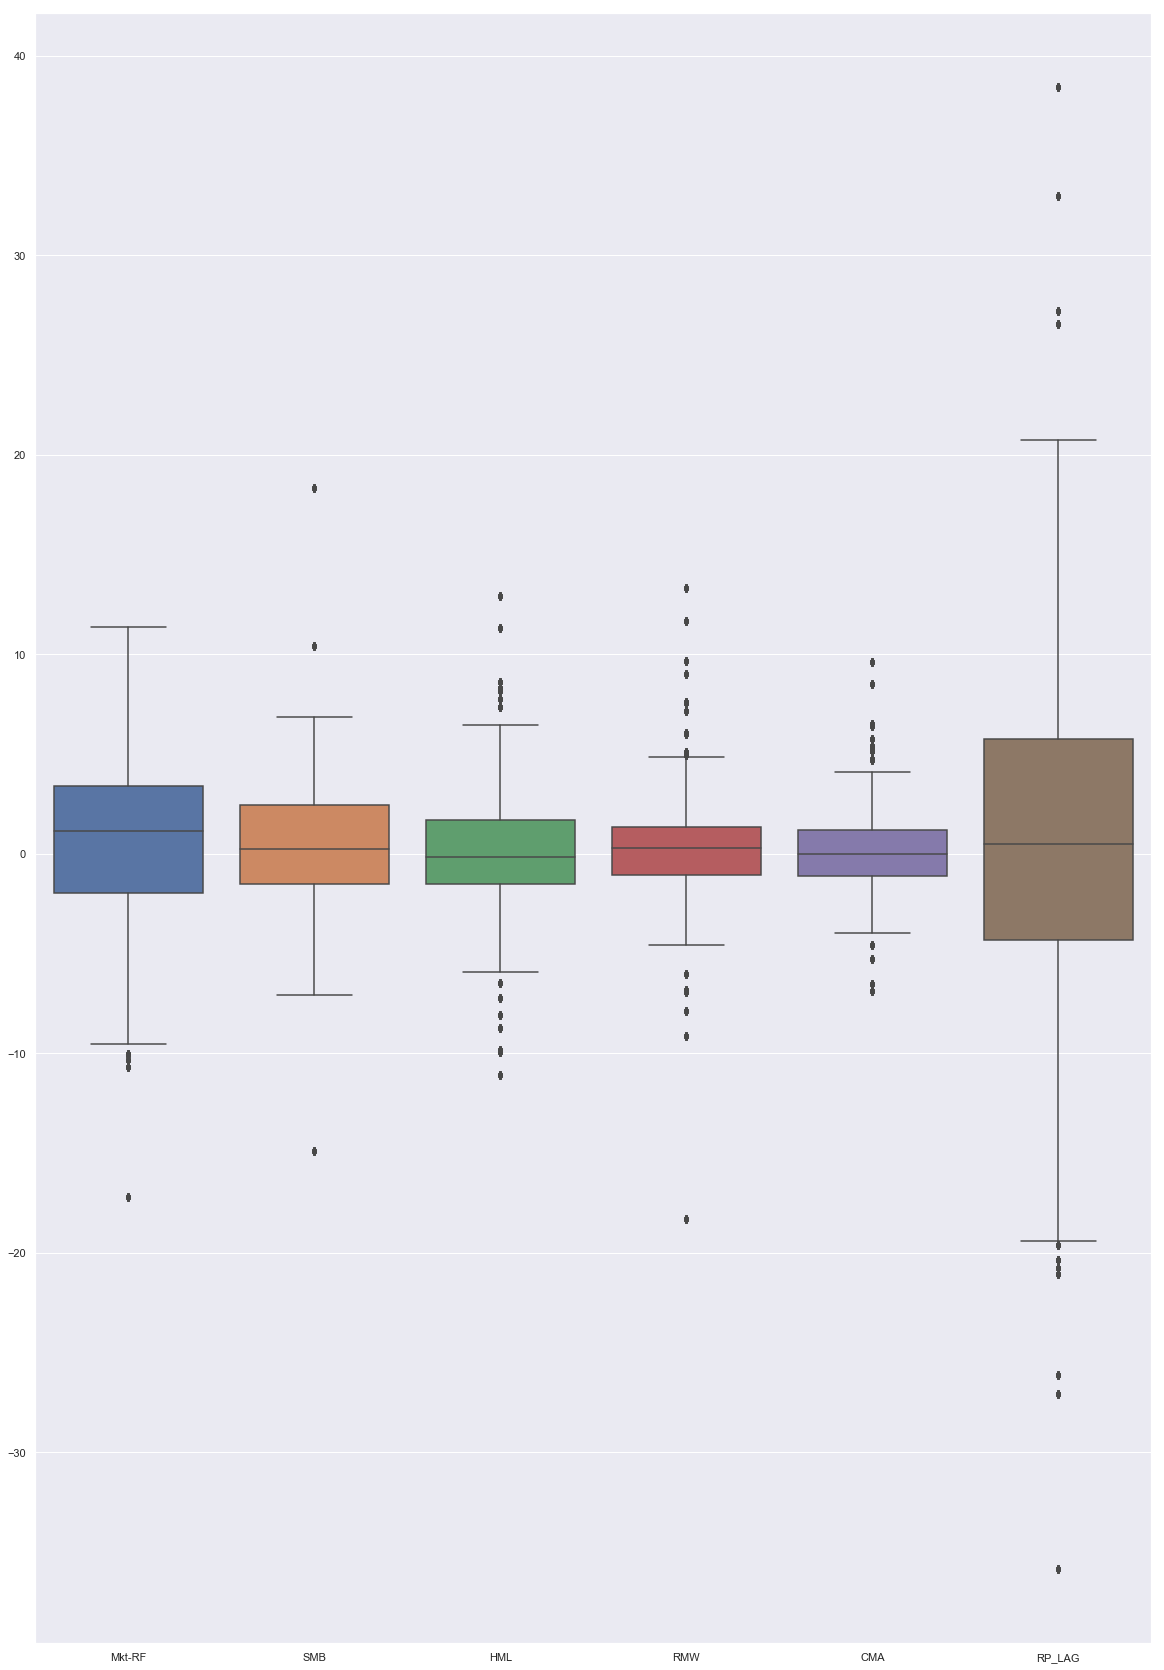

In [206]:
plt.figure(figsize=(20,30))
sns.boxplot(data=data[features_to_include + [label]])

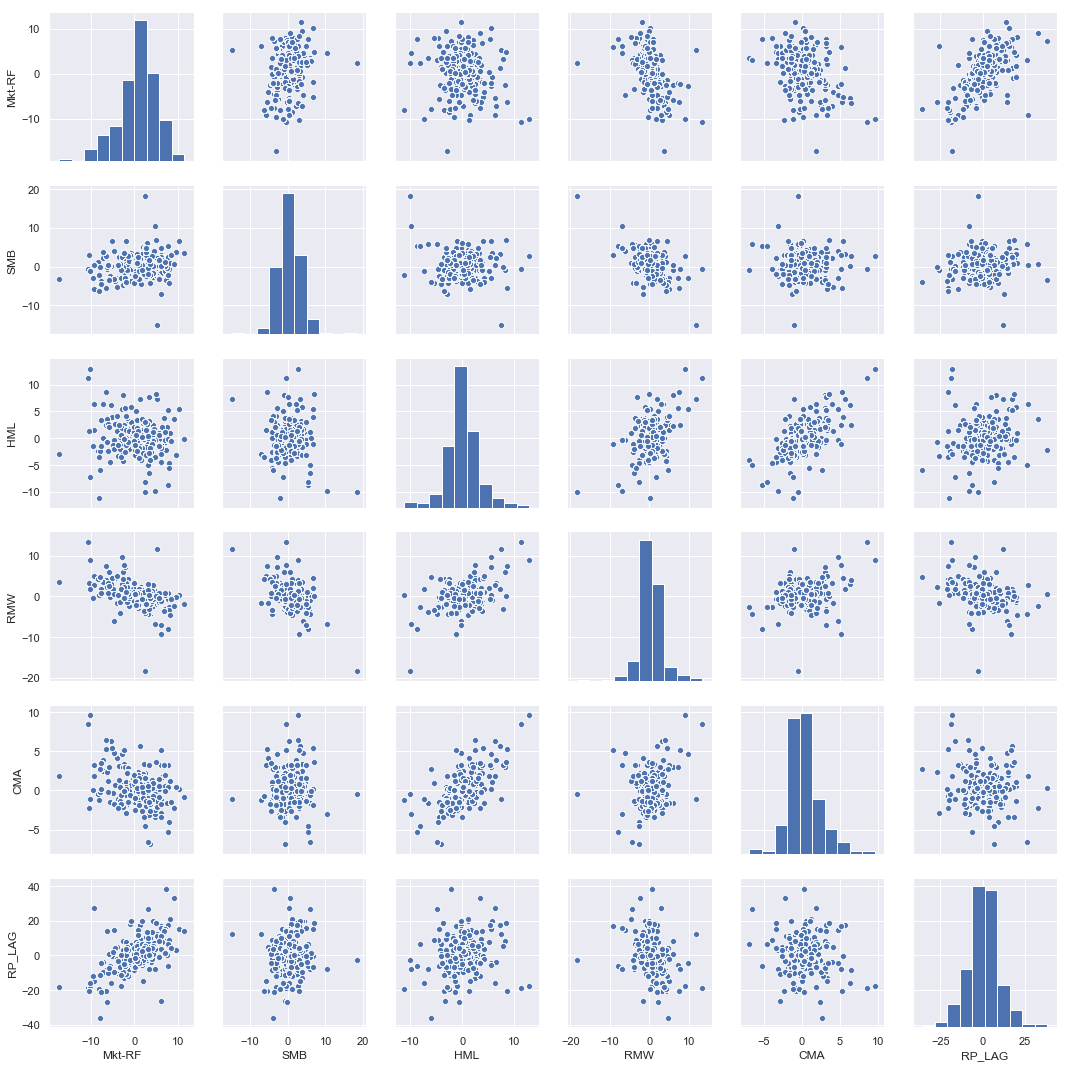

In [207]:
sns.pairplot(data[features_to_include + [label]].dropna());

In [208]:
# PERFORM FEATURE SELECTION

In [209]:
feature_importances = feature_selection.mutual_info_regression(train_set[features_to_include],
                                                               train_set[label])
feat_importance_df = pd.DataFrame(list(zip(features_to_include,feature_importances)), columns=['feature','importance'])
feat_importance_df.sort_values(by='importance', ascending=False, inplace=True)

In [210]:
feat_importance_df

,feature,importance
0,Mkt-RF,4.065138
2,HML,4.063934
4,CMA,4.020664
3,RMW,4.007028
1,SMB,3.961375


In [211]:
six_features = list(feat_importance_df['feature'].head(25).values)

In [212]:
# SCALING FEATURES

In [213]:
from sklearn import preprocessing

sc = preprocessing.StandardScaler()

train_sc = sc.fit_transform(train_set[features_to_include + [label]])
test_sc = sc.transform(test_set[features_to_include + [label]])

X_train_sc = train_sc[:,:-1]
y_train_sc = train_sc[:,-1]

X_test_sc = test_sc[:,:-1]
y_test_sc = test_sc[:,-1]


In [214]:
# APPLY REGRESSION ANALYSIS

In [215]:
linear_regression_model = sk.linear_model.LinearRegression()

In [216]:
linear_regression_model.fit(train_set[features_to_include], train_set[label]) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [217]:
#The bias term.
bias = linear_regression_model.intercept_

#The coefficient, notice it returns an array with one spot for each feature
coefficient = linear_regression_model.coef_

bias

0.4818843342936008

In [218]:
list(zip(features_to_include, coefficient))

[('Mkt-RF', 1.2591663045071175),
 ('SMB', -0.10770604961943592),
 ('HML', 1.5669259177238037),
 ('RMW', -0.5675923776992251),
 ('CMA', -0.7623614448967314)]

In [219]:
print("Score on data model was fitted to:", 
      linear_regression_model.score(train_set[features_to_include], 
                                    train_set[label]))

Score on data model was fitted to: 0.712476787486232


In [220]:
print("Score on test data:", 
      linear_regression_model.score(test_set[features_to_include], 
                                    test_set[label]))

Score on test data: 0.683237796411315


In [221]:
# CHECK MEAN SQUARED ERROR AND ACCURACY SCORE

In [222]:
from sklearn.metrics import mean_squared_error as mse,accuracy_score
from sklearn.metrics import r2_score

def check_accuracy_score(model, train=None, test=None, features=None):
    features = features or features_to_include
    
    if pd.DataFrame(train).empty:
        train = train_set
    
    if pd.DataFrame(test).empty:
        test = test_set
    
    y_train_pred = model.predict(train[features]).ravel()
    y_test_pred = model.predict(test[features]).ravel()

    print("The Mean Squared Error on the Train set is:\t{:0.5f}".format(mse(train['return_lag'].values, y_train_pred)))
    print("The Mean Squared Error on the Test set is:\t{:0.5f}".format(mse(test['return_lag'].values, y_test_pred)))
  
    print("The R2 score on the Train set is:\t{:0.5f}".format(r2_score(train['return_lag'], y_train_pred)))
    print("The R2 score on the Test set is:\t{:0.5f}".format(r2_score(test['return_lag'], y_test_pred)))

In [223]:
from sklearn.metrics import mean_squared_error as mse,accuracy_score
from sklearn.metrics import r2_score

def check_accuracy_score_sc(model):
    y_train_pred = model.predict(X_train_sc).ravel()
    y_test_pred = model.predict(X_test_sc).ravel()

    print("The Mean Squared Error on the Train set is:\t{:0.5f}".format(mse(y_train_sc, y_train_pred)))
    print("The Mean Squared Error on the Test set is:\t{:0.5f}".format(mse(y_test_sc, y_test_pred)))


    print("The R2 score on the Train set is:\t{:0.5f}".format(r2_score(y_train_sc, y_train_pred)))
    print("The R2 score on the Test set is:\t{:0.5f}".format(r2_score(y_test_sc, y_test_pred)))

In [224]:
check_accuracy_score(linear_regression_model)

The Mean Squared Error on the Train set is:	9.48216
The Mean Squared Error on the Test set is:	12.24160
The R2 score on the Train set is:	0.71075
The R2 score on the Test set is:	0.69440


In [225]:
linear_regression_model.fit(train_set[six_features], train_set[label]) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [226]:
check_accuracy_score(linear_regression_model, features=six_features)

The Mean Squared Error on the Train set is:	9.48216
The Mean Squared Error on the Test set is:	12.24160
The R2 score on the Train set is:	0.71075
The R2 score on the Test set is:	0.69440


In [227]:
linear_regression_model.fit(X_train_sc, y_train_sc) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [228]:
check_accuracy_score_sc(linear_regression_model)

The Mean Squared Error on the Train set is:	0.28752
The Mean Squared Error on the Test set is:	0.38794
The R2 score on the Train set is:	0.71248
The R2 score on the Test set is:	0.68324


In [229]:
# SUPPORT VECTOR REGRESSION

In [230]:
from sklearn.svm import SVR

kernel_svm_model = SVR(kernel='rbf')
kernel_svm_model.fit(train_set[features_to_include], train_set[label])

check_accuracy_score(kernel_svm_model)

The Mean Squared Error on the Train set is:	0.01421
The Mean Squared Error on the Test set is:	43.61460
The R2 score on the Train set is:	0.99957
The R2 score on the Test set is:	-0.08881


/Users/khandkerhasan/anaconda/envs/env-py3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [231]:
kernel_svm_model = SVR(kernel='rbf')
kernel_svm_model.fit(train_set[six_features], train_set[label])

check_accuracy_score(kernel_svm_model, features=six_features)

The Mean Squared Error on the Train set is:	0.01421
The Mean Squared Error on the Test set is:	43.61460
The R2 score on the Train set is:	0.99957
The R2 score on the Test set is:	-0.08881


/Users/khandkerhasan/anaconda/envs/env-py3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [232]:
kernel_svm_model = SVR(kernel='rbf')
kernel_svm_model.fit(X_train_sc, y_train_sc)

check_accuracy_score_sc(kernel_svm_model)


The Mean Squared Error on the Train set is:	0.02301
The Mean Squared Error on the Test set is:	0.44566
The R2 score on the Train set is:	0.97699
The R2 score on the Test set is:	0.63612


In [233]:
# DECISION TREE

In [234]:
from sklearn import tree

DT_model = tree.DecisionTreeRegressor()
DT_model.fit(train_set[features_to_include], train_set[label] )

check_accuracy_score(DT_model)

The Mean Squared Error on the Train set is:	0.00502
The Mean Squared Error on the Test set is:	21.16707
The R2 score on the Train set is:	0.99985
The R2 score on the Test set is:	0.47158


In [178]:
# REGULARIZED TREE

In [235]:
DT_model_reg = tree.DecisionTreeRegressor(max_depth=5, min_samples_leaf=50)
DT_model_reg.fit(train_set[features_to_include], train_set[label].values)

check_accuracy_score(DT_model_reg)

The Mean Squared Error on the Train set is:	5.44376
The Mean Squared Error on the Test set is:	12.48643
The R2 score on the Train set is:	0.83394
The R2 score on the Test set is:	0.68828


In [236]:
DT_model_reg = tree.DecisionTreeRegressor(max_depth=5, min_samples_leaf=50)
DT_model_reg.fit(train_set[six_features], train_set[label].values)

check_accuracy_score(DT_model_reg, features=six_features)

The Mean Squared Error on the Train set is:	5.44376
The Mean Squared Error on the Test set is:	12.25908
The R2 score on the Train set is:	0.83394
The R2 score on the Test set is:	0.69396


In [237]:
DT_model_reg = tree.DecisionTreeRegressor(max_depth=5, min_samples_leaf=50)
DT_model_reg.fit(X_train_sc, y_train_sc)

check_accuracy_score_sc(DT_model_reg)

The Mean Squared Error on the Train set is:	0.16565
The Mean Squared Error on the Test set is:	0.39889
The R2 score on the Train set is:	0.83435
The R2 score on the Test set is:	0.67430


In [182]:
# RANDOM FORESTS

In [238]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(n_estimators=50, max_depth=5)
random_forest_model.fit(train_set[features_to_include], train_set[label])

check_accuracy_score(random_forest_model)

The Mean Squared Error on the Train set is:	2.61908
The Mean Squared Error on the Test set is:	15.70711
The R2 score on the Train set is:	0.92011
The R2 score on the Test set is:	0.60788


In [239]:
random_forest_model = RandomForestRegressor(n_estimators=50, max_depth=5)
random_forest_model.fit(train_set[six_features], train_set[label])

check_accuracy_score(random_forest_model, features=six_features)

The Mean Squared Error on the Train set is:	2.62948
The Mean Squared Error on the Test set is:	15.65394
The R2 score on the Train set is:	0.91979
The R2 score on the Test set is:	0.60921


In [240]:
random_forest_model = RandomForestRegressor(n_estimators=50, max_depth=5)
random_forest_model.fit(X_train_sc, y_train_sc)

check_accuracy_score_sc(random_forest_model)

The Mean Squared Error on the Train set is:	0.08108
The Mean Squared Error on the Test set is:	0.51913
The R2 score on the Train set is:	0.91892
The R2 score on the Test set is:	0.57612


['Mkt-RF', 'HML', 'CMA', 'RMW', 'SMB']

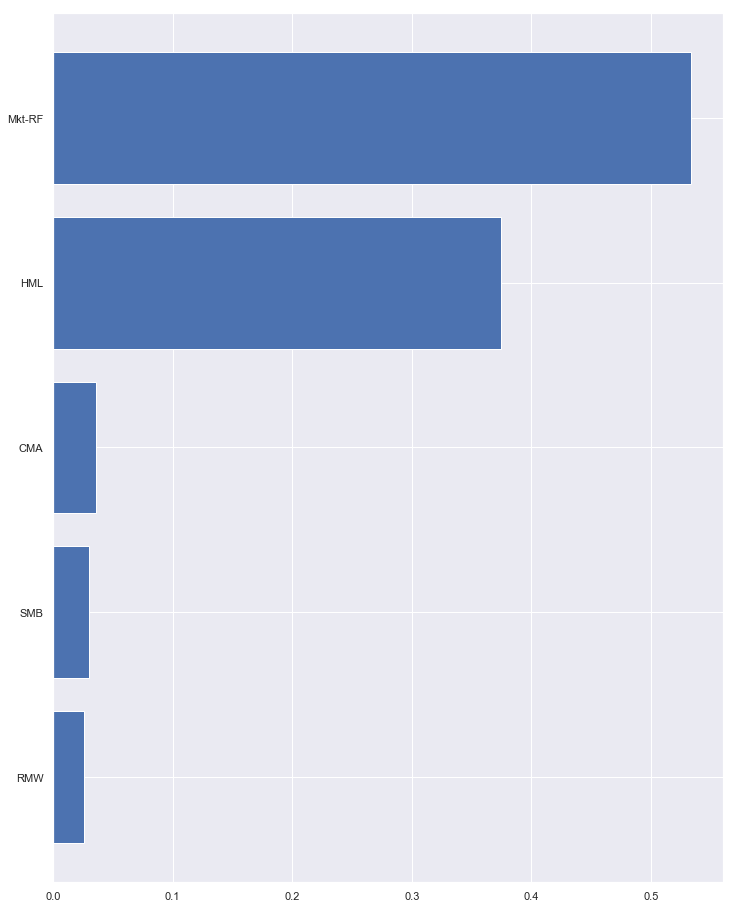

In [241]:
# Feature importance
random_forest_model = RandomForestRegressor(n_estimators=50, max_depth=5)
random_forest_model.fit(train_set[features_to_include], train_set[label])

feat_importance = pd.DataFrame(list(zip(features_to_include, random_forest_model.feature_importances_)), columns=['Features', 'Importance']) 
feat_importance.sort_values(by='Importance', inplace=True)

plt.figure(figsize=[12,16])
plt.barh(feat_importance['Features'], feat_importance['Importance'])
six_features

['Mkt-RF', 'HML', 'CMA', 'RMW', 'SMB']

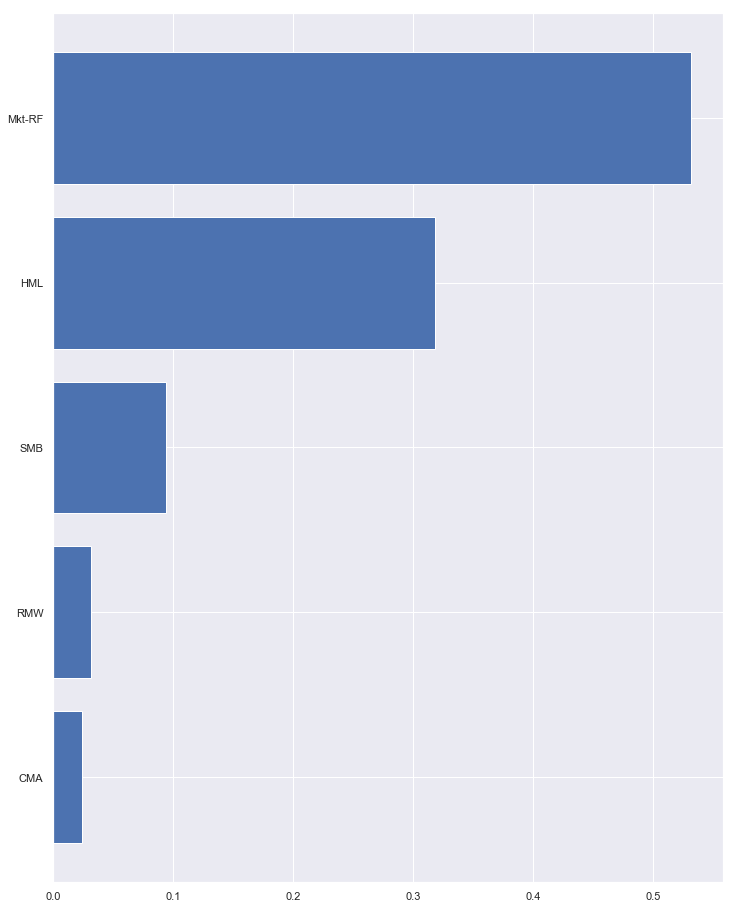

In [242]:
# Feature importance
random_forest_model = RandomForestRegressor(n_estimators=50, max_depth=5)
random_forest_model.fit(X_train_sc, y_train_sc)

feat_importance = pd.DataFrame(list(zip(features_to_include, random_forest_model.feature_importances_)), columns=['Features', 'Importance']) 
feat_importance.sort_values(by='Importance', inplace=True)

plt.figure(figsize=[12,16])
plt.barh(feat_importance['Features'], feat_importance['Importance'])
six_features

In [243]:
# GRADIENT BOOSTED TREES

In [244]:
from sklearn.ensemble import GradientBoostingRegressor

gbm_model = GradientBoostingRegressor(n_estimators=50, max_depth=5, min_samples_leaf=100)
gbm_model.fit(train_set[features_to_include], train_set[label])

check_accuracy_score(gbm_model)

The Mean Squared Error on the Train set is:	0.60930
The Mean Squared Error on the Test set is:	8.73862
The R2 score on the Train set is:	0.98141
The R2 score on the Test set is:	0.78185


In [245]:
gbm_model = GradientBoostingRegressor(n_estimators=50, max_depth=5, min_samples_leaf=100)
gbm_model.fit(train_set[six_features], train_set[label])

check_accuracy_score(gbm_model, features=six_features)

The Mean Squared Error on the Train set is:	0.60930
The Mean Squared Error on the Test set is:	8.73862
The R2 score on the Train set is:	0.98141
The R2 score on the Test set is:	0.78185


In [246]:
gbm_model = GradientBoostingRegressor(n_estimators=50, max_depth=5, min_samples_leaf=100)
gbm_model.fit(X_train_sc, y_train_sc)

check_accuracy_score_sc(gbm_model)

The Mean Squared Error on the Train set is:	0.01827
The Mean Squared Error on the Test set is:	0.28340
The R2 score on the Train set is:	0.98173
The R2 score on the Test set is:	0.76860


['Mkt-RF', 'HML', 'CMA', 'RMW', 'SMB']

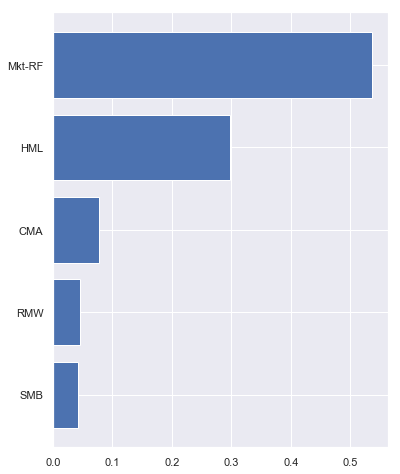

In [247]:
gbm_model = GradientBoostingRegressor(n_estimators=50, max_depth=5, min_samples_leaf=100)
gbm_model.fit(train_set[features_to_include], train_set[label])


feat_importance = pd.DataFrame(list(zip(features_to_include, gbm_model.feature_importances_)), columns=['Features', 'Importance']) 
feat_importance.sort_values(by='Importance', inplace=True)

plt.figure(figsize=[6,8])
plt.barh(feat_importance['Features'], feat_importance['Importance'])
six_features

In [248]:
# SHALLOW NEURAL NET

In [249]:
from sklearn.metrics import mean_squared_error as mse,accuracy_score

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [251]:
model = Sequential()
model.add(Dense(1, input_shape=(len(features_to_include),)))
# TODO Need to find the right learning rate for adam.
model.compile(Adam(lr=0.8), 'mean_squared_error')

epoc = 30
model.fit(train_set[features_to_include], train_set['return_lag'], epochs=epoc)

Epoch 1/30
1500/1500 [==============================] - 0s 284us/step - loss: 16.6864
Epoch 2/30
1500/1500 [==============================] - 0s 26us/step - loss: 11.4819
Epoch 3/30
1500/1500 [==============================] - 0s 26us/step - loss: 11.1684
Epoch 4/30
1500/1500 [==============================] - 0s 25us/step - loss: 11.0230
Epoch 5/30
1500/1500 [==============================] - 0s 25us/step - loss: 11.5322
Epoch 6/30
1500/1500 [==============================] - 0s 26us/step - loss: 11.0601
Epoch 7/30
1500/1500 [==============================] - 0s 26us/step - loss: 11.4549
Epoch 8/30
1500/1500 [==============================] - 0s 27us/step - loss: 10.9674
Epoch 9/30
1500/1500 [==============================] - 0s 26us/step - loss: 11.3029
Epoch 10/30
1500/1500 [==============================] - 0s 24us/step - loss: 10.6077
Epoch 11/30
1500/1500 [==============================] - 0s 26us/step - loss: 11.1684
Epoch 12/30
1500/1500 [==============================] - 0s 25

In [252]:
check_accuracy_score(model)

The Mean Squared Error on the Train set is:	9.96060
The Mean Squared Error on the Test set is:	14.03795
The R2 score on the Train set is:	0.69616
The R2 score on the Test set is:	0.64955


In [255]:
model = Sequential()
model.add(Dense(25, input_shape=(len(features_to_include),), activation='relu' ))
model.add(Dense(10, activation='relu' ))
# model.add(Dense(10, activation='relu' ))
model.add(Dense(1))
# TODO Need to find the right learning rate for adam.
model.compile(Adam(lr=0.5), 'mean_squared_error')

epoc = 13
model.fit(train_set[features_to_include], train_set['return_lag'], epochs=epoc)

Epoch 1/13
1500/1500 [==============================] - 1s 391us/step - loss: 58.1513
Epoch 2/13
1500/1500 [==============================] - 0s 31us/step - loss: 32.8577
Epoch 3/13
1500/1500 [==============================] - 0s 32us/step - loss: 32.8408
Epoch 4/13
1500/1500 [==============================] - 0s 33us/step - loss: 32.8866
Epoch 5/13
1500/1500 [==============================] - 0s 32us/step - loss: 32.8198
Epoch 6/13
1500/1500 [==============================] - 0s 34us/step - loss: 32.9018
Epoch 7/13
1500/1500 [==============================] - 0s 33us/step - loss: 32.9926
Epoch 8/13
1500/1500 [==============================] - 0s 33us/step - loss: 32.8739
Epoch 9/13
1500/1500 [==============================] - 0s 33us/step - loss: 32.9575
Epoch 10/13
1500/1500 [==============================] - 0s 33us/step - loss: 32.9512
Epoch 11/13
1500/1500 [==============================] - 0s 33us/step - loss: 32.8690
Epoch 12/13
1500/1500 [==============================] - 0s 32

In [201]:
check_accuracy_score(model)

The Mean Squared Error on the Train set is:	33.17803
The Mean Squared Error on the Test set is:	42.63545
The R2 score on the Train set is:	-0.01208
The R2 score on the Test set is:	-0.06437
